#ASTR 19 Group Project
Facilitator: Sabrina Lee,
Scribe: Alia Toth-Smith,
Interfacer: Gordon Cai,
Editor: Ali Taquie



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
# Define the data
data = """
1 8:07 6.57
1 15:37 -0.39
2 8:55 5.38
2 16:25 -1.74
3 9:45 5.26
3 17:14 -1.36
4 10:35 4.13
4 18:00 -1.15
5 11:28 3.48
5 18:46 -1.61
6 12:22 2.62
6 19:31 0.05
7 13:24 1.83
7 20:16 1.01
8 3:22 3.57
8 21:01 0.73
9 4:07 4.54
9 21:46 2.17
10 4:50 3.76
10 11:58 2.88
11 5:31 3.90
11 12:56 1.92
12 6:08 4.73
12 13:45 1.74
13 6:47 5.66
13 14:25 0.79
14 7:22 5.33
14 15:00 -0.04
15 7:59 5.23
15 15:34 -1.12
16 8:34 6.67
16 16:08 -0.61
17 9:10 4.74
17 16:41 -0.93
18 9:45 4.69
18 17:12 -1.29
19 10:21 4.20
19 17:45 0.22
20 10:57 3.68
20 18:15 0.26
21 11:38 2.47
21 18:48 0.36
22 12:25 2.59
22 19:20 0.99
23 2:22 4.10
23 19:52 1.87
24 2:58 3.17
24 20:30 1.60
25 3:37 3.71
25 10:44 3.10
26 4:23 4.04
26 11:55 2.49
27 5:15 4.07
27 12:57 2.18
28 6:09 5.93
28 13:50 0.70
29 7:05 6.89
29 14:39 0.21
30 7:58 6.72
30 15:27 0.22
31 8:50 6.77
31 16:10 -1.68
32 9:40 5.77
32 16:52 -1.32
33 10:30 4.35
33 17:34 -0.73
34 11:19 4.23
34 18:12 -0.38
35 12:10 2.24
35 18:49 -0.61
36 1:32 3.45
36 19:24 -0.46
37 2:13 4.13
37 20:00 1.21
38 2:54 3.34
38 9:54 2.58
39 3:39 3.32
39 11:15 3.26
40 4:29 5.21
40 12:22 2.39
41 5:21 4.83
41 13:14 2.41
"""

In [32]:
'''
define an oscillatory function in Python to describe
 the intra- and inter-day variations in the tide
 '''

 

#define the oscillatory function
def oscillatory_function(t, A, B, omega, phi):
    return A * np.sin(omega * t + phi) + B



['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:50' '16:10' '9:40'
 '16:52' '10:30' '17:34' '11:19' '18:12' '12:10' '18:49' '1:32' '19:24'
 '2:13' '20:00' '2:54' '9:54' '3:39' '11:15' '4:29' '12:22' '5:21' '13:14']
[ 6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62  0.05
  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73  1.74
  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69 -1.29
  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17  1.6
  3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72  0.22
 

<function matplotlib.pyplot.show(close=None, block=None)>

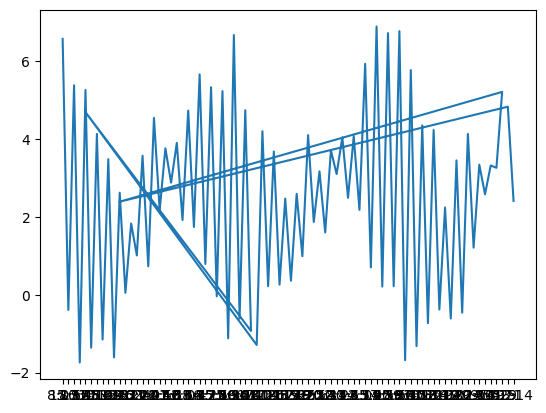

In [34]:
'''1
Using the scipy library, fit the oscillatory function to the
data assuming the root mean squared experimental error on the
 height of the tide is 0.25 ft
'''

def minutes_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    time = hours + (minutes / 60)

_, times, heights = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)


plt.plot(times,heights)
print(times)
print(heights)
plt.show



In [ ]:
'''
subtract off the best fit function from the data and plot the
residuals. Assess graphically and mathematically deviations of
 the measured tidal data from the model. Plot a histogram of the
 residuals and measure the standard deviation
'''

#start code







'\nsubtract off the best fit function from the data and plot the\nresiduals. Assess graphically and mathematically deviations of\n the measured tidal data from the model. Plot a histogram of the\n residuals and measure the standard deviation\n'

In [ ]:
'''
Add a single 2ft outlier to the histogram of data and replot it
 as part of your Jupyter notebook
'''

#start code









'\nAdd a single 2ft outlier to the histogram of data and replot it\n as part of your Jupyter notebook\n'